In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

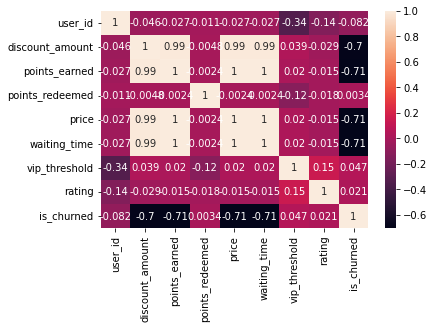

In [7]:
df = pd.read_csv("finalized_data.csv")
sns.heatmap(df.corr(),annot=True)

In [8]:
x = df[['discount_amount','points_earned','price','waiting_time']]
y = df['is_churned']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
from sklearn.model_selection import GridSearchCV
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
#let us try different models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.svm import SVC
models = {
    "Logistic Regression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(n_estimators=200),
    "LightGBM":lgb.LGBMClassifier(n_estimators=200)
}
for key,model in models.items():
  model.fit(x_train,y_train)
  x_test_s = sc.transform(x_test)
  y_pred = model.predict(x_test_s)
  print(key)
  print(accuracy_score(y_test,y_pred), r2_score(y_test,y_pred))


AttributeError: module 'pandas.core.strings' has no attribute 'StringMethods'

In [ ]:
#now we will select random_forest with n_estimators = 200
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train,y_train)
x_test_s = sc.transform(x_test)
y_pred = model.predict(x_test_s)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       115

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
#save model
import joblib
export_data = {
    'model': model,
    'scaler': sc
}

joblib.dump(export_data, 'model_bundle.joblib')

['model_bundle.joblib']

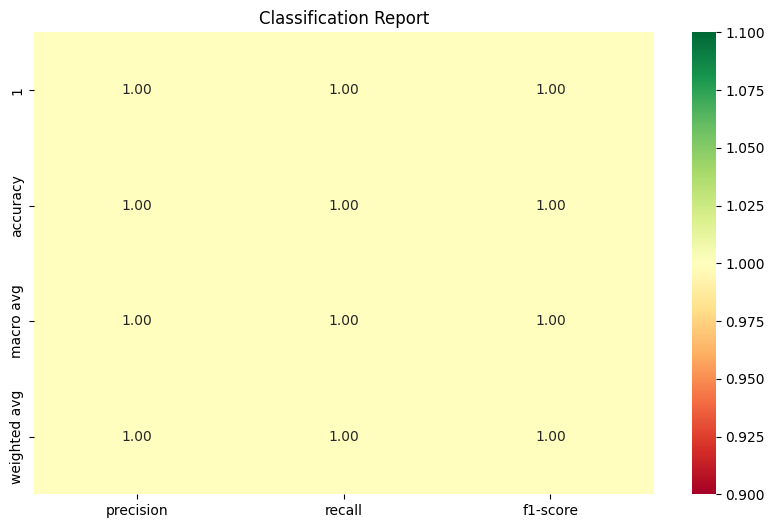

In [ ]:
#export classification_report
report_df = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).iloc[:-1, :].T
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='RdYlGn', fmt='.2f')
# 4. Save the image
plt.title('Classification Report')
plt.savefig('classification_report.png', dpi=300, bbox_inches='tight')
plt.show()